This script determines the number of clusters in GTEx data at gene isoform resolution.

In [1]:
# get gene isoform-based expression
# ! wget -v wget -v https://toil-xena-hub.s3.us-east-1.amazonaws.com/download/gtex_Kallisto_tpm.gz

# unit: log2(tpm+0.001)

In [2]:
import pandas, numpy
import scipy, scipy.signal

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.family':'sans-serif',
                            'font.size':20, 
                            'xtick.labelsize':30, 
                            'ytick.labelsize':30, 
                            'figure.figsize':(16, 9), 
                            'axes.labelsize':40})

# user-defined variables

In [4]:
expression_file = '/home/adrian/databases/gtex/gtex_Kallisto_tpm.tsv'
output_dir = '/home/adrian/scratch/'

In [5]:
iso1 = 'ENST00000354449.7'
iso2 = 'ENST00000354956.9'

# read data

In [6]:
%%time
df = pandas.read_csv(expression_file, index_col=0, sep='\t')
print(df.shape)
df.head()

(197044, 7862)
CPU times: user 2min 41s, sys: 7.85 s, total: 2min 49s
Wall time: 2min 50s


,GTEX-S4Q7-0003-SM-3NM8M,GTEX-QV31-1626-SM-2S1QC,GTEX-13OW5-0626-SM-5J2N2,GTEX-ZPCL-0126-SM-4WWC8,GTEX-S33H-1226-SM-4AD69,GTEX-X88G-0426-SM-47JZ5,GTEX-ZAKK-0326-SM-5EGHA,GTEX-1399S-1726-SM-5L3DI,GTEX-ZF29-0926-SM-4WKFZ,GTEX-13W3W-2626-SM-5SIA2,...,GTEX-YFCO-1626-SM-4W1Z3,GTEX-ZYFD-2126-SM-5E43D,GTEX-OOBK-2626-SM-2HMKY,GTEX-OHPJ-0006-SM-3LK6G,GTEX-1117F-2826-SM-5GZXL,GTEX-11ZTS-3326-SM-5LU9Y,GTEX-VJYA-0726-SM-4KL1T,GTEX-ZA64-2126-SM-5Q5A8,GTEX-Q2AG-2826-SM-2HMJQ,GTEX-XV7Q-0426-SM-4BRVN
sample,,,,,,,,,,,,,,,,,,,,,
ENST00000548312.5,0.6076,-9.9658,-2.0383,-2.4547,-9.9658,-2.0296,-2.8442,-2.8942,-9.9658,-4.1466,...,-2.9665,-2.5532,-2.3819,-3.1603,-2.9115,-2.5561,-3.6911,-9.9658,-2.3476,-3.7775
ENST00000527779.1,2.6670,-0.3332,1.9686,0.8771,0.5483,0.8687,-1.4169,0.7208,-0.0964,-2.5380,...,0.6720,1.8185,0.8372,0.0069,0.4200,-9.9658,0.8522,0.9251,-0.3617,0.6359
ENST00000454820.5,-9.9658,-9.9658,-4.0293,-9.9658,-9.9652,-3.0899,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658
ENST00000535093.1,3.2928,0.8198,1.7315,-0.0599,0.0884,0.0295,-0.9753,0.8344,0.5548,-1.7844,...,-9.9658,0.8024,1.5409,-9.9658,2.5220,0.0528,-0.2491,1.3763,-9.9658,0.4520
ENST00000346219.7,-9.9658,-7.7128,-1.4648,-8.9045,-9.9658,-9.9658,-9.9658,-1.4929,-9.9658,-4.2916,...,-5.0550,-9.9658,-3.1692,-9.9658,-9.9646,-1.3133,-9.9658,-2.9489,-3.8318,-9.9658


# transform data

In [7]:
# transform data to tpm + 1
tpm_plus_one = ((2**df) - 0.001) + 1
log2_tpm_plus_one = numpy.log2(tpm_plus_one)

# subset data 

In [8]:
print(tpm_plus_one.loc[iso1, :].sum())
print(tpm_plus_one.loc[iso2, :].sum())
print()
print(log2_tpm_plus_one.loc[iso1, :].sum())
print(log2_tpm_plus_one.loc[iso2, :].sum())

53858.77279795975
20431.399267388566

20714.16670264977
8098.126212382613


In [9]:
expression = tpm_plus_one[tpm_plus_one.sum(axis=1) >= tpm_plus_one.loc[iso2, :].sum()]
print(expression.shape)
expression.head()

(47390, 7862)


,GTEX-S4Q7-0003-SM-3NM8M,GTEX-QV31-1626-SM-2S1QC,GTEX-13OW5-0626-SM-5J2N2,GTEX-ZPCL-0126-SM-4WWC8,GTEX-S33H-1226-SM-4AD69,GTEX-X88G-0426-SM-47JZ5,GTEX-ZAKK-0326-SM-5EGHA,GTEX-1399S-1726-SM-5L3DI,GTEX-ZF29-0926-SM-4WKFZ,GTEX-13W3W-2626-SM-5SIA2,...,GTEX-YFCO-1626-SM-4W1Z3,GTEX-ZYFD-2126-SM-5E43D,GTEX-OOBK-2626-SM-2HMKY,GTEX-OHPJ-0006-SM-3LK6G,GTEX-1117F-2826-SM-5GZXL,GTEX-11ZTS-3326-SM-5LU9Y,GTEX-VJYA-0726-SM-4KL1T,GTEX-ZA64-2126-SM-5Q5A8,GTEX-Q2AG-2826-SM-2HMJQ,GTEX-XV7Q-0426-SM-4BRVN
sample,,,,,,,,,,,,,,,,,,,,,
ENST00000625998.2,4.508341,4.281511,1.520305,2.017044,3.579946,4.325719,3.894274,2.432856,5.100353,2.233563,...,2.151686,1.000098,3.390308,1.000002,4.409540,5.505477,2.786075,2.907713,10.445632,4.434452
ENST00000583693.5,3.203116,3.159552,5.076260,4.537898,3.023268,3.049392,2.139527,5.071741,3.782307,1.925973,...,2.240600,4.049615,4.970269,1.507035,3.697018,8.175100,2.222488,4.242384,9.067497,3.975671
ENST00000012134.6,1.019636,2.885484,2.476236,1.740131,1.069370,4.595267,2.949576,3.139429,3.130103,3.352487,...,3.561585,10.928355,4.250037,1.265702,3.221217,3.701510,3.124939,3.809058,9.770357,2.611948
ENST00000403263.5,6.669201,5.401735,4.662697,4.241485,2.474394,4.940104,3.550066,4.720283,6.448032,3.383357,...,3.524204,4.733202,3.830173,1.670100,4.975778,4.396562,3.279737,6.128080,5.785596,3.847890
ENST00000449352.6,3.238691,6.966803,4.645216,5.132317,1.703221,7.120563,4.722605,4.324797,7.158017,5.169152,...,5.908922,6.221353,3.160451,10.544363,3.350856,8.127507,6.181686,4.765958,2.465523,1.000000


In [10]:
log2expression = log2_tpm_plus_one[log2_tpm_plus_one.sum(axis=1) >= log2_tpm_plus_one.loc[iso2, :].sum()]
print(log2expression.shape)
log2expression.head()

(46490, 7862)


,GTEX-S4Q7-0003-SM-3NM8M,GTEX-QV31-1626-SM-2S1QC,GTEX-13OW5-0626-SM-5J2N2,GTEX-ZPCL-0126-SM-4WWC8,GTEX-S33H-1226-SM-4AD69,GTEX-X88G-0426-SM-47JZ5,GTEX-ZAKK-0326-SM-5EGHA,GTEX-1399S-1726-SM-5L3DI,GTEX-ZF29-0926-SM-4WKFZ,GTEX-13W3W-2626-SM-5SIA2,...,GTEX-YFCO-1626-SM-4W1Z3,GTEX-ZYFD-2126-SM-5E43D,GTEX-OOBK-2626-SM-2HMKY,GTEX-OHPJ-0006-SM-3LK6G,GTEX-1117F-2826-SM-5GZXL,GTEX-11ZTS-3326-SM-5LU9Y,GTEX-VJYA-0726-SM-4KL1T,GTEX-ZA64-2126-SM-5Q5A8,GTEX-Q2AG-2826-SM-2HMJQ,GTEX-XV7Q-0426-SM-4BRVN
sample,,,,,,,,,,,,,,,,,,,,,
ENST00000625998.2,2.172597,2.098120,0.604361,1.012243,1.839938,2.112940,1.961354,1.282651,2.350597,1.159347,...,1.105468,0.000141,1.761416,0.000002,2.140628,2.460868,1.478234,1.539885,3.384828,2.148756e+00
ENST00000583693.5,1.679476,1.659720,2.343766,2.182024,1.596109,1.608522,1.097292,2.342481,1.919266,0.945588,...,1.163885,2.017785,2.313324,0.591713,1.886362,3.031236,1.152176,2.084875,3.180704,1.991199e+00
ENST00000012134.6,0.028054,1.528813,1.308149,0.799196,0.096761,2.200149,1.560507,1.650502,1.646210,1.745232,...,1.832520,3.450004,2.087475,0.339938,1.687606,1.888114,1.643828,1.929434,3.288411,1.385126e+00
ENST00000403263.5,2.737514,2.433423,2.221165,2.084570,1.307075,2.304542,1.827846,2.238873,2.688859,1.758455,...,1.817297,2.242817,1.937410,0.739935,2.314922,2.136376,1.713580,2.615435,2.532466,1.944068e+00
ENST00000449352.6,1.695411,2.800497,2.215746,2.359610,0.768266,2.831991,2.239583,2.112632,2.839560,2.369928,...,2.562895,2.637228,1.660130,3.398400,1.744530,3.022813,2.628000,2.252766,1.301894,8.428712e-08


18.9029029403544
4385


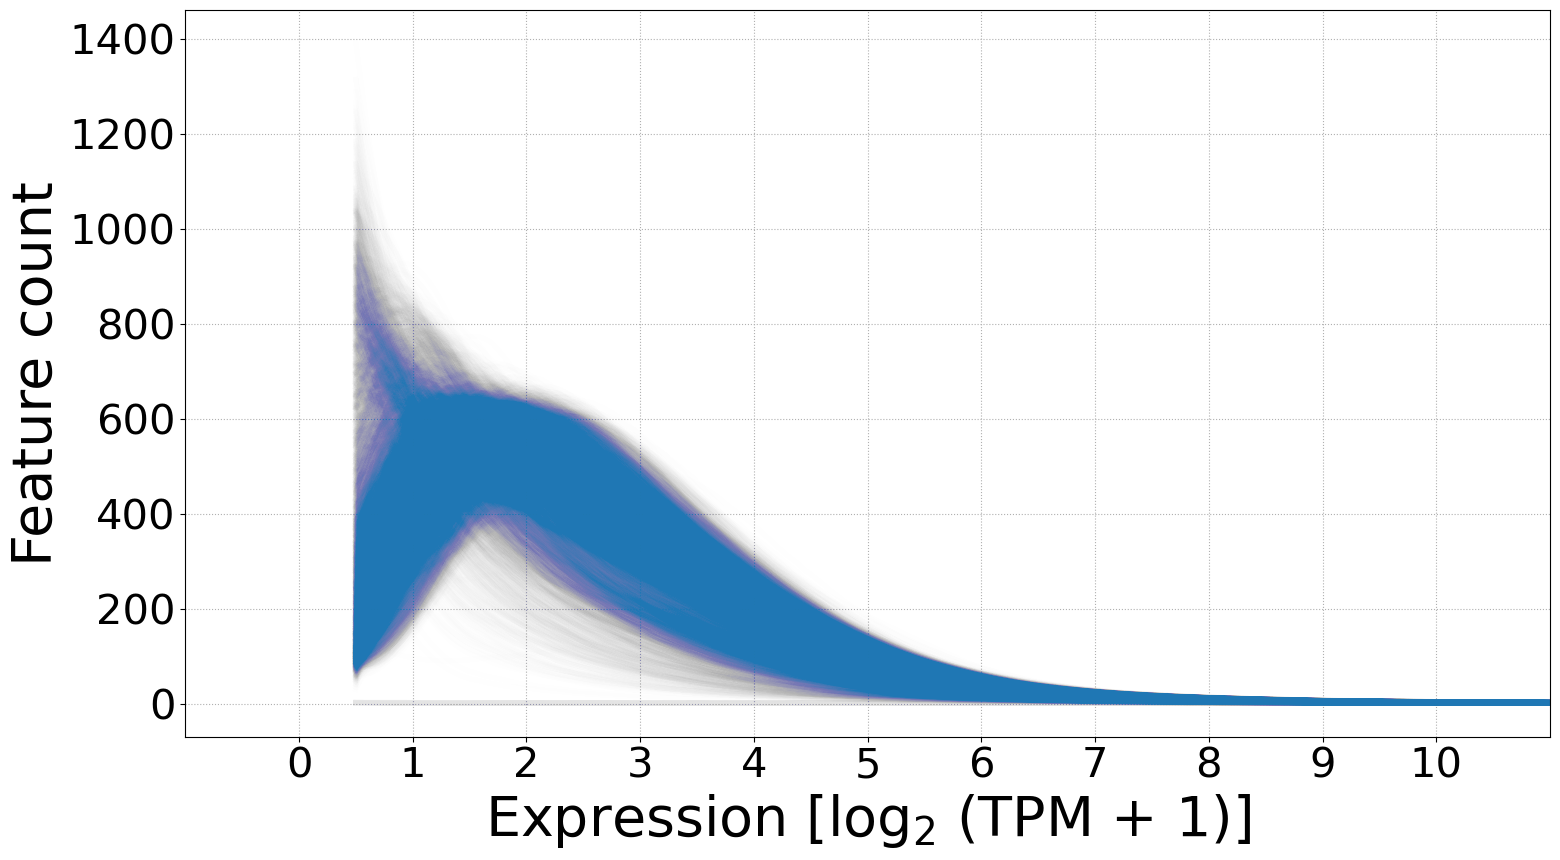

In [11]:
found_max = 19
resolution = 25
number_of_bins = found_max * resolution
absolute_max = 0
margin = int(resolution/2)

most_likely_expressions = []

selected_samples = []

for sample in log2expression.columns:
        
    expression_values = log2expression.loc[:, sample]
    
    # histogram
    hist, bin_edges = numpy.histogram(expression_values, bins=number_of_bins, range=(0, found_max))
    half_bin = (bin_edges[1] - bin_edges[0])/2
    x = bin_edges + half_bin
    x = x[:-1]
    
    # curve fitting
    plotting_x = x[margin:-margin]
    plotting_hist = hist[margin:-margin]
    yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)
    
    # determine most likely expression
    most_likely_expression = x[numpy.argmax(yhat)]
    most_likely_expressions.append(most_likely_expression)
    
    # sample selection
    if 1 <= most_likely_expression <= 2:
        selected_samples.append(sample)
    
    # plotting
    matplotlib.pyplot.plot(plotting_x, yhat, '-', lw=4, alpha=1/300, color='tab:blue')
    
    # check
    if numpy.max(expression_values) > absolute_max:
        absolute_max = numpy.max(expression_values)

# check print
print(absolute_max)
print(len(selected_samples))

matplotlib.pyplot.xlim(-1, 11)                  
matplotlib.pyplot.xticks(range(0, 10+1))
matplotlib.pyplot.xlabel('Expression [log$_2$ (TPM + 1)]')
matplotlib.pyplot.ylabel('Feature count')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

9.26


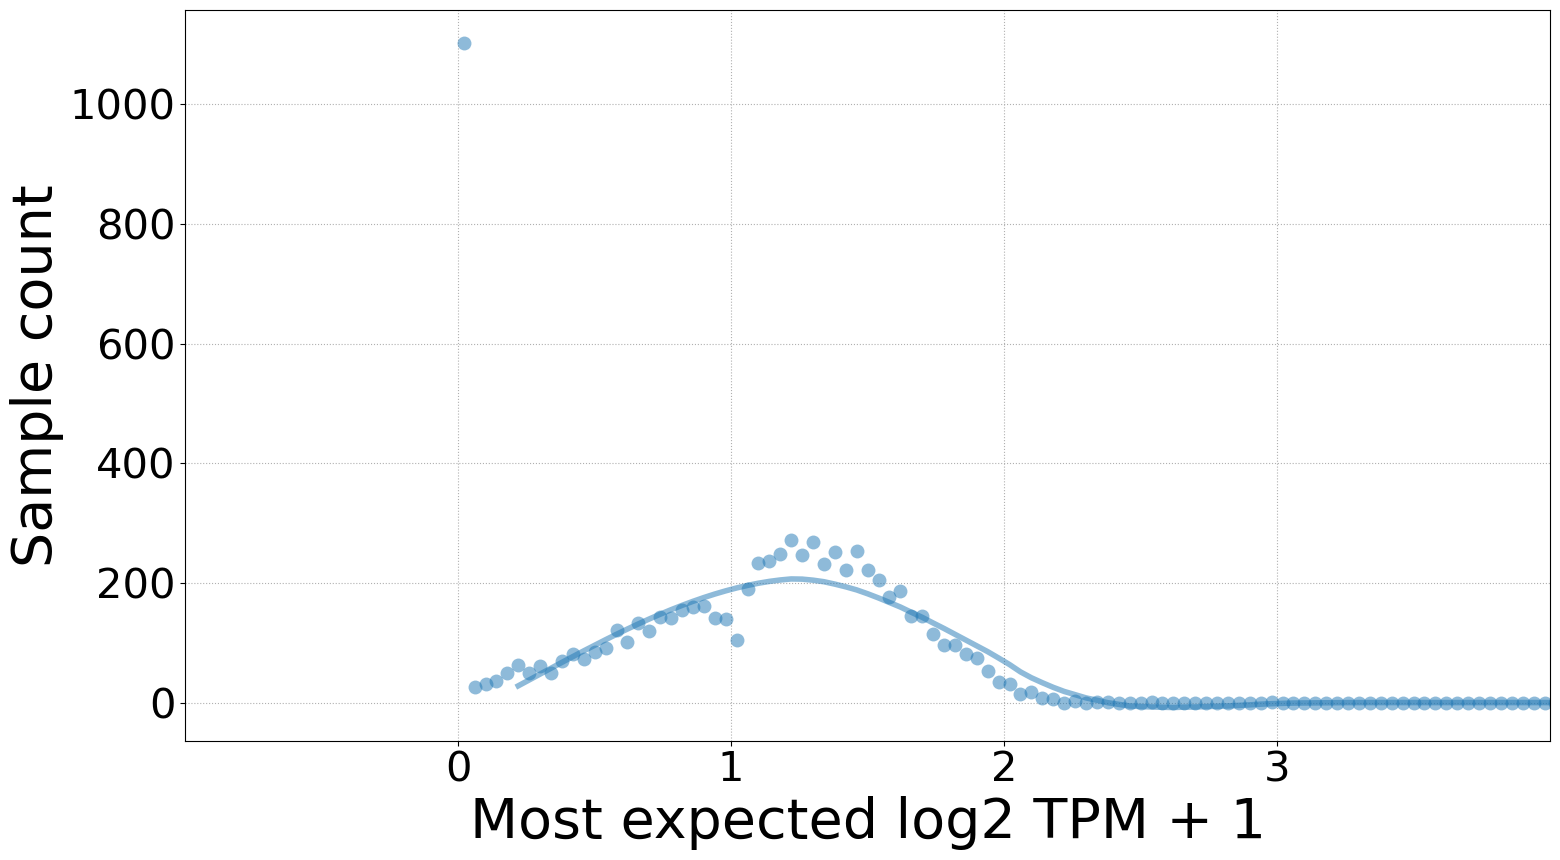

In [12]:
print(numpy.max(most_likely_expressions))

margin = 5

# histogram
hist, bin_edges = numpy.histogram(most_likely_expressions, bins=250, range=(0, 10))
half_bin = (bin_edges[1] - bin_edges[0])/2
x = bin_edges + half_bin
x = x[:-1]

# curve fitting
plotting_x = x[margin:-margin]
plotting_hist = hist[margin:-margin]
yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)

matplotlib.pyplot.plot(x, hist, 'o', color='tab:blue', alpha=1/2, markeredgecolor='None', ms=10)
matplotlib.pyplot.plot(plotting_x, yhat, '-', lw=4, alpha=1/2, color='tab:blue')

matplotlib.pyplot.xlim(-1, 4)                  
matplotlib.pyplot.xticks(range(0, 3+1))
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.xlabel('Most expected log2 TPM + 1')
matplotlib.pyplot.ylabel('Sample count')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [13]:
selected_expression = log2expression.loc[:, selected_samples]
print(selected_expression.shape)
selected_expression.head()

(46490, 4385)


,GTEX-S4Q7-0003-SM-3NM8M,GTEX-QV31-1626-SM-2S1QC,GTEX-13OW5-0626-SM-5J2N2,GTEX-ZPCL-0126-SM-4WWC8,GTEX-X88G-0426-SM-47JZ5,GTEX-1399S-1726-SM-5L3DI,GTEX-ZF29-0926-SM-4WKFZ,GTEX-WHPG-0226-SM-3NMB9,GTEX-P44H-0526-SM-2XCF1,GTEX-11ONC-2326-SM-5HL6P,...,GTEX-144GO-0126-SM-5LUAO,GTEX-1313W-1626-SM-5J1OE,GTEX-12ZZY-1526-SM-5LZWF,GTEX-QMRM-0826-SM-3NB33,GTEX-OOBK-2626-SM-2HMKY,GTEX-1117F-2826-SM-5GZXL,GTEX-11ZTS-3326-SM-5LU9Y,GTEX-ZA64-2126-SM-5Q5A8,GTEX-Q2AG-2826-SM-2HMJQ,GTEX-XV7Q-0426-SM-4BRVN
sample,,,,,,,,,,,,,,,,,,,,,
ENST00000625998.2,2.172597,2.098120,0.604361,1.012243,2.112940,1.282651,2.350597,1.055977,2.652690,2.268121,...,0.979851,2.130198,1.992097,1.513298,1.761416,2.140628,2.460868,1.539885,3.384828,2.148756e+00
ENST00000583693.5,1.679476,1.659720,2.343766,2.182024,1.608522,2.342481,1.919266,2.462014,1.794654,1.688779,...,2.027438,1.520067,1.725912,2.402364,2.313324,1.886362,3.031236,2.084875,3.180704,1.991199e+00
ENST00000012134.6,0.028054,1.528813,1.308149,0.799196,2.200149,1.650502,1.646210,2.311007,1.437005,2.369605,...,1.576889,1.827558,2.260518,1.542512,2.087475,1.687606,1.888114,1.929434,3.288411,1.385126e+00
ENST00000403263.5,2.737514,2.433423,2.221165,2.084570,2.304542,2.238873,2.688859,2.615937,3.291015,2.220693,...,2.220222,2.060171,2.130275,2.778681,1.937410,2.314922,2.136376,2.615435,2.532466,1.944068e+00
ENST00000449352.6,1.695411,2.800497,2.215746,2.359610,2.831991,2.112632,2.839560,2.607822,1.759019,2.999159,...,3.785498,1.353480,2.671217,2.489579,1.660130,1.744530,3.022813,2.252766,1.301894,8.428712e-08


In [14]:
unselected_expression = log2expression.drop(selected_samples, axis=1)
print(unselected_expression.shape)
unselected_expression.head()

(46490, 3477)


,GTEX-S33H-1226-SM-4AD69,GTEX-ZAKK-0326-SM-5EGHA,GTEX-13W3W-2626-SM-5SIA2,GTEX-R55F-0226-SM-48FCI,GTEX-VJYA-0005-SM-3P5ZD,GTEX-POMQ-0006-SM-5SI7D,GTEX-147F4-1226-SM-5NQAY,GTEX-1269C-2626-SM-5EQ5C,GTEX-1399Q-0005-SM-5NQAG,GTEX-OHPJ-0926-SM-2HMJ1,...,GTEX-1122O-2126-SM-5EGIR,GTEX-1313W-0011-R1b-SM-5EQ4A,GTEX-13NZA-0526-SM-5L3D7,GTEX-WI4N-2026-SM-4OOS7,GTEX-R55E-0008-SM-48FCG,GTEX-1399R-0426-SM-5IJE3,GTEX-YFCO-1626-SM-4W1Z3,GTEX-ZYFD-2126-SM-5E43D,GTEX-OHPJ-0006-SM-3LK6G,GTEX-VJYA-0726-SM-4KL1T
sample,,,,,,,,,,,,,,,,,,,,,
ENST00000625998.2,1.839938,1.961354,1.159347,2.720612,0.861256,-1.571525e-08,0.885167,1.616264,0.831616,0.790162,...,2.402770,1.448327,1.719845,5.076747e-01,0.855777,0.474905,1.105468,0.000141,0.000002,1.478234
ENST00000583693.5,1.596109,1.097292,0.945588,2.685648,0.896282,3.433451e-01,0.541739,0.935471,2.264318,0.455860,...,1.018920,1.025729,0.521598,1.899552e-01,0.682124,0.842459,1.163885,2.017785,0.591713,1.152176
ENST00000012134.6,0.096761,1.560507,1.745232,2.490648,0.441733,6.035042e-01,0.591106,1.753737,0.551887,0.125459,...,2.398716,2.974338,0.754590,3.629749e-01,0.069841,0.490209,1.832520,3.450004,0.339938,1.643828
ENST00000403263.5,1.307075,1.827846,1.758455,2.705186,0.215624,5.478217e-01,0.462612,1.611616,0.579942,1.498195,...,1.840731,1.006701,1.571772,1.683420e-01,1.242616,1.377358,1.817297,2.242817,0.739935,1.713580
ENST00000449352.6,0.768266,2.239583,2.369928,1.829786,1.803281,1.134920e+00,0.916127,2.320919,2.025324,1.273712,...,2.778254,2.179061,2.010484,8.428712e-08,1.764521,0.962978,2.562895,2.637228,3.398400,2.628000


17.787006372627527
4385


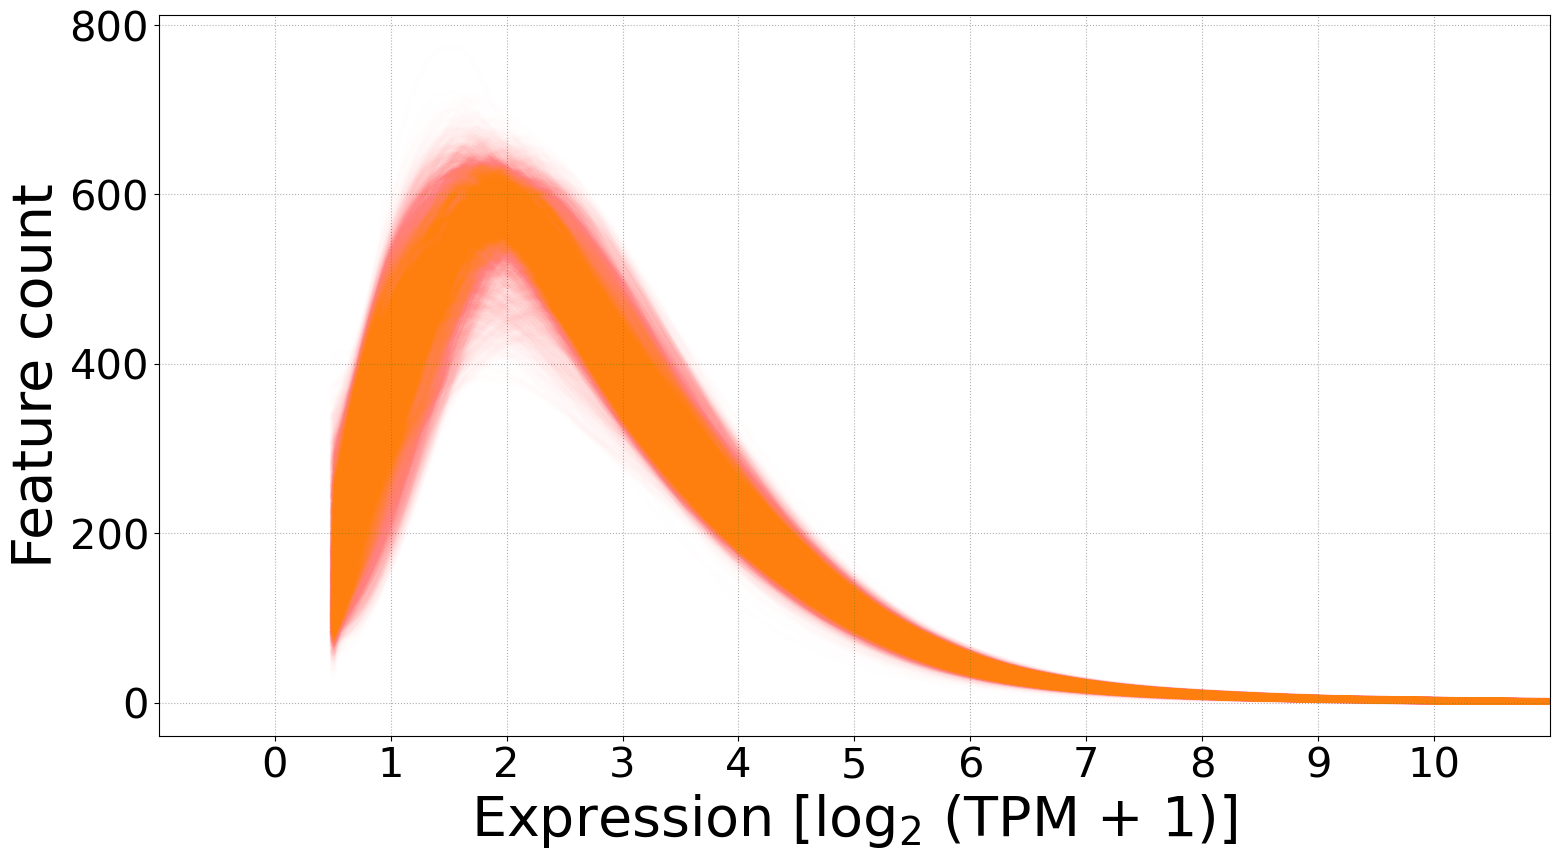

In [15]:
found_max = 19
resolution = 25
number_of_bins = found_max * resolution
absolute_max = 0
margin = int(resolution/2)

most_likely_expressions = []

selected_samples = []

for sample in selected_expression.columns:
        
    expression_values = selected_expression.loc[:, sample]
    
    # histogram
    hist, bin_edges = numpy.histogram(expression_values, bins=number_of_bins, range=(0, found_max))
    half_bin = (bin_edges[1] - bin_edges[0])/2
    x = bin_edges + half_bin
    x = x[:-1]
    
    # curve fitting
    plotting_x = x[margin:-margin]
    plotting_hist = hist[margin:-margin]
    yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)
    
    # determine most likely expression
    most_likely_expression = x[numpy.argmax(yhat)]
    most_likely_expressions.append(most_likely_expression)
    
    # sample selection
    if 1 <= most_likely_expression <= 2:
        selected_samples.append(sample)
    
    # plotting
    matplotlib.pyplot.plot(plotting_x, yhat, '-', lw=4, alpha=1/300, color='tab:orange')
    
    # check
    if numpy.max(expression_values) > absolute_max:
        absolute_max = numpy.max(expression_values)

# check print
print(absolute_max)
print(len(selected_samples))

matplotlib.pyplot.xlim(-1, 11)                  
matplotlib.pyplot.xticks(range(0, 10+1))
matplotlib.pyplot.xlabel('Expression [log$_2$ (TPM + 1)]')
matplotlib.pyplot.ylabel('Feature count')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

18.9029029403544
0


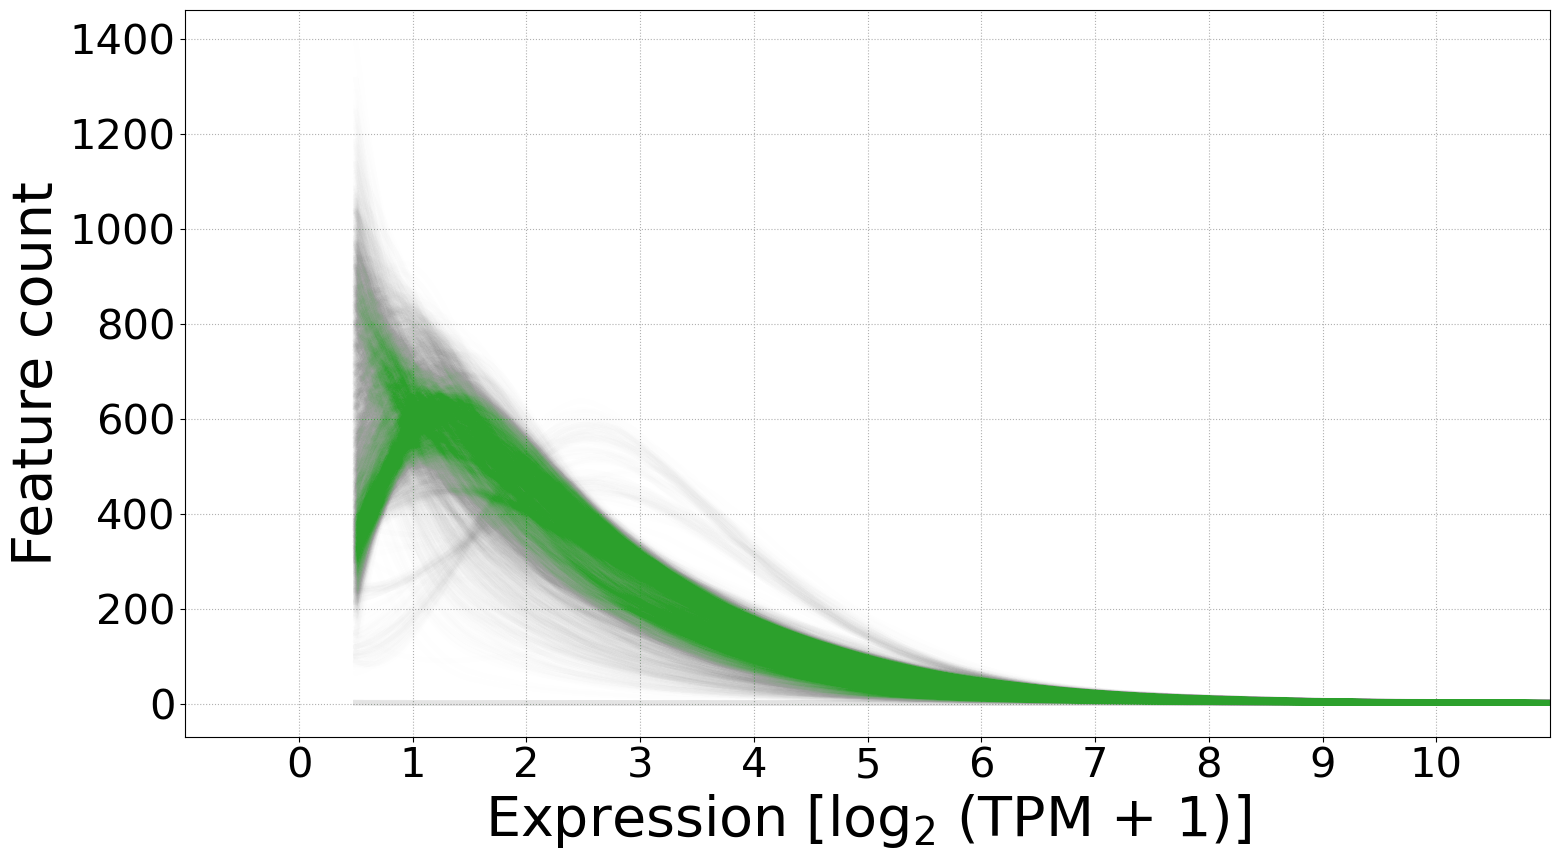

In [16]:
found_max = 19
resolution = 25
number_of_bins = found_max * resolution
absolute_max = 0
margin = int(resolution/2)

most_likely_expressions = []

selected_samples = []

for sample in unselected_expression.columns:
        
    expression_values = unselected_expression.loc[:, sample]
    
    # histogram
    hist, bin_edges = numpy.histogram(expression_values, bins=number_of_bins, range=(0, found_max))
    half_bin = (bin_edges[1] - bin_edges[0])/2
    x = bin_edges + half_bin
    x = x[:-1]
    
    # curve fitting
    plotting_x = x[margin:-margin]
    plotting_hist = hist[margin:-margin]
    yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)
    
    # determine most likely expression
    most_likely_expression = x[numpy.argmax(yhat)]
    most_likely_expressions.append(most_likely_expression)
    
    # sample selection
    if 1 <= most_likely_expression <= 2:
        selected_samples.append(sample)
    
    # plotting
    matplotlib.pyplot.plot(plotting_x, yhat, '-', lw=4, alpha=1/300, color='tab:green')
    
    # check
    if numpy.max(expression_values) > absolute_max:
        absolute_max = numpy.max(expression_values)

# check print
print(absolute_max)
print(len(selected_samples))

matplotlib.pyplot.xlim(-1, 11)                  
matplotlib.pyplot.xticks(range(0, 10+1))
matplotlib.pyplot.xlabel('Expression [log$_2$ (TPM + 1)]')
matplotlib.pyplot.ylabel('Feature count')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

# store expression to alliviate RAM demands

In [17]:
print(selected_expression.shape)
selected_expression.head()

(46490, 4385)


,GTEX-S4Q7-0003-SM-3NM8M,GTEX-QV31-1626-SM-2S1QC,GTEX-13OW5-0626-SM-5J2N2,GTEX-ZPCL-0126-SM-4WWC8,GTEX-X88G-0426-SM-47JZ5,GTEX-1399S-1726-SM-5L3DI,GTEX-ZF29-0926-SM-4WKFZ,GTEX-WHPG-0226-SM-3NMB9,GTEX-P44H-0526-SM-2XCF1,GTEX-11ONC-2326-SM-5HL6P,...,GTEX-144GO-0126-SM-5LUAO,GTEX-1313W-1626-SM-5J1OE,GTEX-12ZZY-1526-SM-5LZWF,GTEX-QMRM-0826-SM-3NB33,GTEX-OOBK-2626-SM-2HMKY,GTEX-1117F-2826-SM-5GZXL,GTEX-11ZTS-3326-SM-5LU9Y,GTEX-ZA64-2126-SM-5Q5A8,GTEX-Q2AG-2826-SM-2HMJQ,GTEX-XV7Q-0426-SM-4BRVN
sample,,,,,,,,,,,,,,,,,,,,,
ENST00000625998.2,2.172597,2.098120,0.604361,1.012243,2.112940,1.282651,2.350597,1.055977,2.652690,2.268121,...,0.979851,2.130198,1.992097,1.513298,1.761416,2.140628,2.460868,1.539885,3.384828,2.148756e+00
ENST00000583693.5,1.679476,1.659720,2.343766,2.182024,1.608522,2.342481,1.919266,2.462014,1.794654,1.688779,...,2.027438,1.520067,1.725912,2.402364,2.313324,1.886362,3.031236,2.084875,3.180704,1.991199e+00
ENST00000012134.6,0.028054,1.528813,1.308149,0.799196,2.200149,1.650502,1.646210,2.311007,1.437005,2.369605,...,1.576889,1.827558,2.260518,1.542512,2.087475,1.687606,1.888114,1.929434,3.288411,1.385126e+00
ENST00000403263.5,2.737514,2.433423,2.221165,2.084570,2.304542,2.238873,2.688859,2.615937,3.291015,2.220693,...,2.220222,2.060171,2.130275,2.778681,1.937410,2.314922,2.136376,2.615435,2.532466,1.944068e+00
ENST00000449352.6,1.695411,2.800497,2.215746,2.359610,2.831991,2.112632,2.839560,2.607822,1.759019,2.999159,...,3.785498,1.353480,2.671217,2.489579,1.660130,1.744530,3.022813,2.252766,1.301894,8.428712e-08


In [18]:
%%time
selected_expression.to_csv('{}/selected_expression.tsv'.format(output_dir), sep='\t')

CPU times: user 2min 25s, sys: 1.33 s, total: 2min 27s
Wall time: 2min 27s
